In [53]:
import gensim
from gensim.models import Word2Vec
from gensim import corpora
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import glob

# Possible things to try for exploratory data analysis

## The files here are sample files, we can replace them with actual ones to see the real results

In [54]:
#load the model
w2v_model = gensim.models.Word2Vec.load('word2vec_model.model')

In [55]:
#open the source file, get it in the required form
source_file = open('../pre-cleaned/sample-files-for-eda/sample-source.txt','r')
source_lines = source_file.read()
source_tokens = []
source_tokens = source_tokens + source_lines.split('\n')

s_corpus = [element.split(" ") for element in source_tokens]

source_corpus = []
for line in s_corpus:
    if line != ['']:
        source_corpus.append([elem for elem in line if elem != ''])
        
#source curpus is our final list

In [56]:
#do the same for test corpus suspected algo
test_file = open('../pre-cleaned/sample-files-for-eda/sample-suspected.txt','r')
test_lines = test_file.read()
test_tokens = []
test_tokens = test_tokens + test_lines.split('\n')

t_corpus = [element.split(" ") for element in test_tokens]

test_corpus = []
for line in t_corpus:
    if line != ['']:
        test_corpus.append([elem for elem in line if elem != ''])



In [60]:
#calculate the similarity between every sentence in the source and every sentence in the test
max_similarity=[]
for test_sentence in test_corpus: #iterate over every sentence in the test corpus
    similarities=[]
    for source_sentence in source_corpus: #for every sentence in the test, iterate over every sentence in the source
        similarities.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    #out of all similarities for each sentence in the test to every sentence in the source, get the maximum one
    max_similarity.append(max(similarities))

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [63]:
max_similarity

[0.9408203,
 0.987776,
 0.9453467,
 0.98556787,
 0.93947834,
 0.9991054,
 1.0,
 0.9927274,
 0.9571395,
 0.9355696,
 0.96963966,
 0.95185095,
 0.97399616,
 0.9621766]

In [61]:
#get the final mean similarity for the whole test corpus
mean_similarity = sum(max_similarity)/float(len(max_similarity))

In [62]:
mean_similarity

0.9672281742095947

In [ ]:
#below we plot the scatterplot of max similarity(y axis) for every sentence in the test corpus (x axis)

In [49]:
x=[]
for i in range(0,len(max_similarity)):
    x.append(i+1)

In [50]:
y = max_similarity

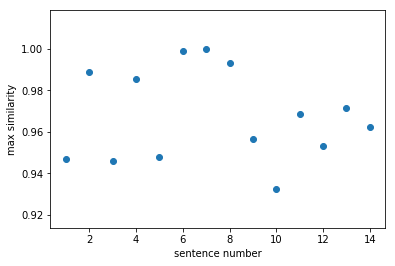

In [52]:
plt.scatter(x, y)
plt.xlabel('sentence number')
plt.ylabel('max similarity')
plt.show()

In [66]:
#here we calculate the percentage of sentences in the source corpus for which the similarity for that sentence in
#the test is >0.7 (which can be adjusted)
count_similar_sentences=[]
for test_sentence in test_corpus:
    similarities=[]
    for source_sentence in source_corpus:
        similarities.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    count_similar_sentences.append(len([elem for elem in similarities if elem > 0.7])/len(similarities))

In [67]:
count_similar_sentences

[1.0,
 1.0,
 0.8571428571428571,
 1.0,
 0.9285714285714286,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9285714285714286,
 1.0]

In [68]:
#get the average of all percentages
mean_count_similar_sentences = sum(count_similar_sentences)/len(count_similar_sentences)

In [69]:
mean_count_similar_sentences

0.9795918367346939

In [71]:
#again plot the scatterplot for sentence of the test corpus vs % of similar sentences for it in the source
x=[]
for i in range(0,len(count_similar_sentences)):
    x.append(i+1)

In [72]:
y = count_similar_sentences

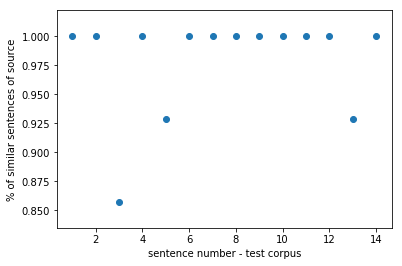

In [74]:
plt.scatter(x, y)
plt.xlabel('sentence number - test corpus')
plt.ylabel('% of similar sentences of source')
plt.show()

### Now we repeat the same things done above for suspected-no-algo against source corpus

In [75]:
test_file_no_algo = open('../pre-cleaned/sample-files-for-eda/sample-no-suspected.txt','r')
test_lines_no_algo = test_file_no_algo.read()
test_tokens_no_algo = []
test_tokens_no_algo = test_tokens_no_algo + test_lines_no_algo.split('\n')

t_corpus_no_algo = [element.split(" ") for element in test_tokens_no_algo]

test_corpus_no_algo = []
for line in t_corpus_no_algo:
    if line != ['']:
        test_corpus_no_algo.append([elem for elem in line if elem != ''])

# test_dictionary = corpora.Dictionary(test_corpus)
# test_bow = [test_dictionary.doc2bow(text.lower().split()) for text in test_tokens]

In [76]:
max_similarity_no_algo=[]
for test_sentence in test_corpus_no_algo:
    similarities_no_algo=[]
    for source_sentence in source_corpus:
        similarities_no_algo.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    max_similarity_no_algo.append(max(similarities_no_algo))

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [77]:
max_similarity_no_algo

[0.8449875,
 0.7946235,
 0.620169,
 0.6968636,
 0.70143855,
 0.72665346,
 0.61890507,
 0.6989717,
 0.5535282]

In [78]:
mean_similarity_no_algo = sum(max_similarity_no_algo)/float(len(max_similarity_no_algo))

In [79]:
mean_similarity_no_algo

0.6951267255677117

In [82]:
x=[]
for i in range(0,len(max_similarity_no_algo)):
    x.append(i+1)

In [83]:
y = max_similarity_no_algo

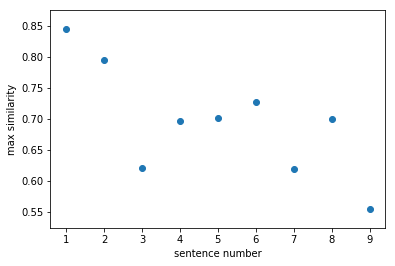

In [84]:
plt.scatter(x, y)
plt.xlabel('sentence number')
plt.ylabel('max similarity')
plt.show()

In [85]:
count_similar_sentences_no_algo=[]
for test_sentence in test_corpus_no_algo:
    similarities=[]
    for source_sentence in source_corpus:
        similarities.append(w2v_model.wv.n_similarity(source_sentence,test_sentence))
    count_similar_sentences_no_algo.append(len([elem for elem in similarities if elem > 0.7])/len(similarities))

In [86]:
count_similar_sentences_no_algo

[0.7142857142857143,
 0.2857142857142857,
 0.0,
 0.0,
 0.07142857142857142,
 0.21428571428571427,
 0.0,
 0.0,
 0.0]

In [87]:
mean_count_similar_sentences_no_algo = sum(count_similar_sentences_no_algo)/len(count_similar_sentences_no_algo)

In [88]:
mean_count_similar_sentences_no_algo

0.14285714285714285

In [89]:
x=[]
for i in range(0,len(count_similar_sentences_no_algo)):
    x.append(i+1)

In [90]:
y = count_similar_sentences_no_algo

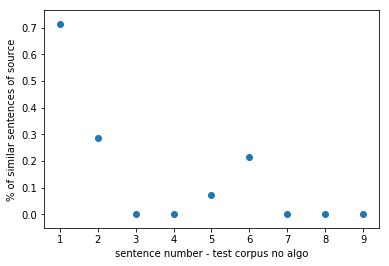

In [91]:
plt.scatter(x, y)
plt.xlabel('sentence number - test corpus no algo')
plt.ylabel('% of similar sentences of source')
plt.show()